<a href="https://colab.research.google.com/github/arturbernardo/data_roads/blob/main/data_roads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install overpy


In [ ]:
import overpy

api = overpy.Overpass()
# bbox = box()  # (min_lon, min_lat, max_lon, max_lat)
# -33.0,-58.0,-27.0,-49.0
# Consulta: rodovias com ref RS-*
query = """
[out:json][timeout:25];
(
  way(around:100000, -30.0346, -51.2177)["highway"]["ref"~"ERS-"];
);
out geom;
"""

result = api.query(query)

# Iterar sobre os caminhos encontrados
for way in result.ways:
    print(way.tags.get("ref"))
    # print(way.tags.get("ref"), [(node.lat, node.lon) for node in way.nodes])


In [21]:
result.ways

[<overpy.Way id=26004699 nodes=[494013492, 512528897, 515914416, 1898344521, 1898344545, 515914415, 920264293, 515914414, 515914413, 515914412, 515914411, 1898344678, 1898344691, 515914407, 515914399, 515914395, 515914387, 515914383, 515914382, 515914381, 515914380, 515914379, 1898345036, 920264285, 515914369, 8813780892, 1898345038, 515914363, 1898344873, 1898344858, 515914360, 515914357, 515914354, 515914351, 1898344720, 1898344722, 515914346, 6331529320, 515914342, 1911506420, 515914334, 1911506477, 515914333, 515914332, 1911506493, 515914331, 515914328, 1911506502, 515914326, 1911506507]>,
 <overpy.Way id=26872033 nodes=[1616923799, 298594950, 1411555486, 2686851194, 2686851193, 1411555457]>,
 <overpy.Way id=26872678 nodes=[293822923, 2418786261, 294941119, 294941120, 294941121, 6162649063, 294941083, 8607903075, 9510712813, 294941084, 9337291639, 296275796, 296275797, 297914950, 9337291641, 297914951, 297914952, 297914953, 297914955, 9337291642, 297914758, 9337291644, 618145699, 8

In [23]:
import overpy
import geopandas as gpd
from shapely.geometry import LineString

api = overpy.Overpass()

query = """
[out:json][timeout:25];
(
  way(around:100000, -30.0346, -51.2177)["highway"]["ref"~"ERS-"];
);
out geom;
"""

result = api.query(query)

features = []
for way in result.ways:
    if not way.geometry or len(way.geometry) < 2:
        continue
    coords = [(pt.lon, pt.lat) for pt in way.geometry]
    line = LineString(coords)
    ref = way.tags.get("ref", "")
    name = way.tags.get("name", "")
    features.append({"ref": ref, "name": name, "geometry": line})

gdf = gpd.GeoDataFrame(features, crs="EPSG:4326")
gdf.plot()


AttributeError: 'Way' object has no attribute 'geometry'

<Axes: >

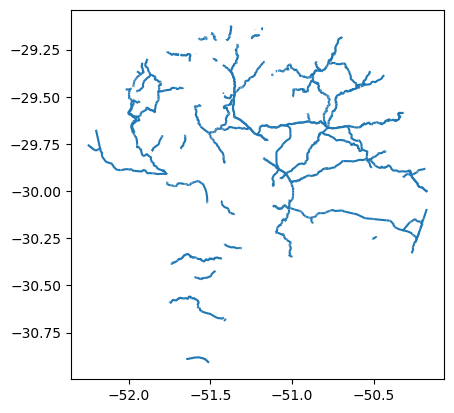

In [25]:
import requests
import geopandas as gpd
from shapely.geometry import LineString

query = """
[out:json][timeout:25];
(
  way(around:100000, -30.0346, -51.2177)["highway"]["ref"~"ERS-"];
);
out geom;
"""

url = "http://overpass-api.de/api/interpreter"
response = requests.post(url, data={"data": query})
data = response.json()

features = []
for el in data["elements"]:
    if el["type"] == "way" and "geometry" in el and len(el["geometry"]) >= 2:
        coords = [(pt["lon"], pt["lat"]) for pt in el["geometry"]]
        line = LineString(coords)
        tags = el.get("tags", {})
        features.append({
            "ref": tags.get("ref", ""),
            "name": tags.get("name", ""),
            "geometry": line
        })

gdf = gpd.GeoDataFrame(features, crs="EPSG:4326")
gdf.plot()


In [2]:
!pip install pyrosm geopandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp311-cp311-linux_x86_64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.0 MB/s eta 0:00:00
  Created wheel for pyrosm: filename=pyrosm-0.6.2-cp311-cp311-linux_x86_64.whl size=7685538 sha256=67f484bdf9f794b4e0bdb0d273625766cbe6f35425fe46ced5c839f0c9bfb75c
  Stored in directory: /root/.cache/pip/wheels/f3/77/c3/7b767c229a2bba06eb2e47fbce4cdbc4490b38d97f2a0ae64d
  Created wheel for cykhash: filename=cykhash-2.0.1-cp311-cp311-linux_x86_64.whl size=3686020 sha256=0da2cffbf78ebaf56137dfd670ae8665c4fb86e0b7f6aa83387ca9d32bc3b525


In [ ]:
# https://download.geofabrik.de/south-america/brazil/sul-latest.osm.pbf


In [3]:
uri = "https://download.geofabrik.de/south-america/brazil/sul-latest.osm.pbf"
# uri = "https://raw.githubusercontent.com/arturbernardo/data_roads/refs/heads/main/georoads.json"
!wget -U "Mozilla" -O sul.osm.pbf {uri}

--2025-05-10 19:48:37--  https://download.geofabrik.de/south-america/brazil/sul-latest.osm.pbf
Resolving download.geofabrik.de (download.geofabrik.de)... 95.217.63.98, 95.216.245.233, 95.217.45.61, ...
Connecting to download.geofabrik.de (download.geofabrik.de)|95.217.63.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395531704 (377M) [application/octet-stream]
Saving to: ‘sul.osm.pbf’

sul.osm.pbf         100%[===================>] 377.21M  10.3MB/s    in 38s     

2025-05-10 19:49:16 (9.86 MB/s) - ‘sul.osm.pbf’ saved [395531704/395531704]



In [5]:
from pyrosm import get_data, OSM
import matplotlib.pyplot as plt
from shapely.geometry import box

bbox = box(-57.0, -33.0, -49.0, -27.0)  # (min_lon, min_lat, max_lon, max_lat)

osm = OSM("sul.osm.pbf", bounding_box=bbox)

# Extrai todas as vias (estradas, ruas, etc.)
roads = osm.get_network(network_type="driving")  # ou 'all' para todas as vias

# Plota
roads.plot(figsize=(12, 12), linewidth=0.5)
plt.title("Rodovias e estradas - Região Sul do Brasil")
plt.show()


KeyboardInterrupt: 

In [6]:
from pyrosm import OSM
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

bbox = box(-57.0, -33.0, -49.0, -27.0)  # (min_lon, min_lat, max_lon, max_lat)

osm = OSM("sul.osm.pbf", bounding_box=bbox)

# Carrega somente geometrias que tenham tag 'highway'
roads = osm.get_data_by_custom_criteria(
    custom_filter={"highway": True},
    filter_type="keep",
    osm_keys_to_keep=[],  # Não queremos colunas extras
)



/usr/local/lib/python3.11/dist-packages/pyrosm/pyrosm.py:767: UserWarning: Could not find any OSM data for given area.
  gdf = get_user_defined_data(


AttributeError: 'NoneType' object has no attribute 'head'

In [8]:
# Agora roads é bem mais leve, só com geometria
print(roads.head())  # Só deve ter 'geometry'

# Plot simples
roads.plot(figsize=(10, 10), linewidth=0.3)
plt.show()

In [5]:
from pyrosm import OSM
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

bbox = box(-51.9698, -29.5048, -52.9698, -28.5048)  # (min_lon, min_lat, max_lon, max_lat)

osm = OSM("sul.osm.pbf", bounding_box=bbox)
osm.file_size

377.21

In [ ]:
# Se quiser uma cidade,
# você pode baixar a geometria de um município via IBGE
# ou shapefile e
# passar como polygon.

In [1]:
import pandas as pd
import geopandas as gpd


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [27]:
# import geopandas as gpd

# gdf = gpd.read_file("/content/GEOFT_TRECHO_RODOVIARIO_ESTADUAL.shp")
# print(gdf.columns)


Index(['geometry'], dtype='object')


In [28]:
# import geopandas as gpd

# # Carregue o arquivo shapefile (.shp)
# gdf = gpd.read_file("/content/GEOFT_TRECHO_RODOVIARIO_ESTADUAL.shp")

# # Exporte para GeoJSON
# gdf.to_file("rodovias_estaduais.geojson", driver="GeoJSON")


/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [29]:
# rodovias_est = gpd.read_file("/content/rodovias_estaduais.geojson")
# # rodovias = rodovias.to_crs(epsg=4674)
# rodovias_est = rodovias_est.to_crs(epsg=3857)

In [ ]:
# rodovias_est

In [ ]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(10, 10))
# rodovias_est.plot(ax=ax, color='lightgray')
# # gdf_acidentes_x.plot(ax=ax, color='red', markersize=5)
# plt.show()


In [3]:
uri = "https://gist.githubusercontent.com/jaumpedro214/8524d59a2e7791c504eda0783975bcb0/raw/810b46a61fe909ca0a8416d762928e230fe8aa8c/rodovias_federais_brasil.json"
# uri = "https://raw.githubusercontent.com/arturbernardo/data_roads/refs/heads/main/georoads.json"
!wget -U "Mozilla" -O georoads.json {uri}

--2025-05-10 19:09:56--  https://gist.githubusercontent.com/jaumpedro214/8524d59a2e7791c504eda0783975bcb0/raw/810b46a61fe909ca0a8416d762928e230fe8aa8c/rodovias_federais_brasil.json
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9396202 (9.0M) [text/plain]
Saving to: ‘georoads.json’

georoads.json       100%[===================>]   8.96M  57.9MB/s    in 0.2s    

2025-05-10 19:09:56 (57.9 MB/s) - ‘georoads.json’ saved [9396202/9396202]



In [4]:
uri = "https://raw.githubusercontent.com/arturbernardo/data_roads/refs/heads/main/demostrativo_acidentes_viasul.csv"
!wget -U "Mozilla" -O demostrativo_acidentes_viasul.csv {uri}

--2025-05-10 19:09:58--  https://raw.githubusercontent.com/arturbernardo/data_roads/refs/heads/main/demostrativo_acidentes_viasul.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2037064 (1.9M) [application/octet-stream]
Saving to: ‘demostrativo_acidentes_viasul.csv’

demostrativo_aciden 100%[===================>]   1.94M  --.-KB/s    in 0.07s   

2025-05-10 19:09:58 (27.7 MB/s) - ‘demostrativo_acidentes_viasul.csv’ saved [2037064/2037064]



In [5]:
# path = "/content/demostrativo_acidentes_ecosul.csv"
path = '/content/demostrativo_acidentes_viasul.csv'

df = pd.read_csv(path, sep=";",encoding="latin-1", engine='python')

In [6]:
df.columns

Index(['data', 'horario', 'n_da_ocorrencia', 'tipo_de_ocorrencia', 'km',
       'trecho', 'sentido', 'tipo_de_acidente', 'automovel', 'bicicleta',
       'caminhao', 'moto', 'onibus', 'outros', 'tracao_animal',
       'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios',
       'ilesos', 'levemente_feridos', 'moderadamente_feridos',
       'gravemente_feridos', 'mortos'],
      dtype='object')

In [ ]:
df

In [7]:
# df['km_c'] = (
#     df['km']
#     .astype(str)
#     .str.split(',', n=1).str[0]
#     .str.replace(r'\D', '', regex=True)
#     .astype('Int64')
# )

df['km_c'] = (
    df['km']
    .astype(str)  # Assegura que os valores sejam strings
    .str.replace(r'[.,].*', '', regex=True)  # Remove tudo após o ponto ou vírgula
    .str.replace(r'\D', '', regex=True)  # Remove qualquer caractere não numérico
    .astype('Int64')  # Converte para inteiro
)

In [8]:
y = df['trecho'].unique()
print(y)

['BR-290/RS' 'BR-386/RS' 'BR-101/RS' 'BR-448/RS']


In [9]:
df_386 = df[df['trecho'] == 'BR-386/RS']

In [10]:
df_386 = df_386[df_386['mortos'] > 0]

In [11]:
x = df_386['mortos'].sum()
print(x)

177


In [ ]:
df_386

In [14]:
rodovias = gpd.read_file("/content/georoads.json")
# rodovias = rodovias.to_crs(epsg=4674)
rodovias = rodovias.to_crs(epsg=3857)

In [16]:
y = rodovias['vl_br'].unique()
print(y)

['010' '050' '158' '020' '153' '230' '210' '459' '030' '040' '101' '342'
 '364' '163' '060' '070' '307' '122' '080' '174' '104' '110' '116' '135'
 '154' '235' '423' '251' '265' '146' '222' '267' '287' '424' '352' '419'
 '476' '484' '356' '259' '404' '120' '155' '156' '369' '330' '349' '439'
 '457' '283' '428' '490' '293' '308' '453' '232' '374' '359' '242' '376'
 '402' '430' '226' '455' '285' '304' '403' '373' '316' '492' '377' '324'
 '497' '272' '343' '277' '280' '290' '456' '432' '433' '405' '406' '262'
 '407' '319' '427' '434' '282' '317' '354' '485' '361' '363' '365' '367'
 '393' '381' '383' '386' '464' '392' '401' '431' '408' '447' '414' '448'
 '409' '410' '411' '412' '470' '413' '477' '415' '478' '416' '417' '418'
 '421' '450' '420' '479' '452' '422' '425' '426' '429' '435' '436' '437'
 '438' '440' '451' '454' '458' '460' '463' '461' '462' '465' '468' '466'
 '467' '486' '469' '487' '471' '472' '473' '474' '480' '475' '481' '482'
 '483' '488' '489' '491' '493' '494' '495' '496' '4

In [17]:
rodovias = rodovias[rodovias['vl_br'] == '386']

In [ ]:
rodovias

In [18]:
from shapely.geometry import Point

def ponto_por_km(rodovia_linha, km, km_total):
    frac = km / km_total
    if frac < 0: frac = 0
    if frac > 1: frac = 1
    return rodovia_linha.interpolate(frac, normalized=True)

In [19]:
from shapely.ops import linemerge, unary_union
from shapely.geometry import LineString, MultiLineString

In [20]:
from tqdm import tqdm  # para mostrar barra de progresso

nome = '386'
acidente_coords = []
linha_rodovia = rodovias[rodovias["vl_br"] == nome]  # ajuste o nome da coluna
multi = unary_union(linha_rodovia.geometry)

for _, ac in tqdm(df_386.iterrows(), total=len(df_386)):
    km = ac["km_c"]

    # Seleciona a linha da rodovia correspondente
    # linha_rodovia = rodovias[rodovias["vl_br"] == nome]  # ajuste o nome da coluna
    # if linha_rodovia.empty:
    #     continue

    # linha = linha_rodovia.iloc[0].geometry
    comprimento = multi.length  # em graus (se não for projetado)

    # corrigindo offset da rodovia 386
    ponto = ponto_por_km(multi, km - 4.6, km_total=525)  # ajuste se souber o km total real
    acidente_coords.append(ponto)





100%|██████████| 146/146 [00:00<00:00, 4601.57it/s]


In [ ]:
acidente_coords

In [21]:
# Criar GeoDataFrame dos acidentes
import geopandas as gpd

gdf_acidentes = gpd.GeoDataFrame(df_386, geometry=acidente_coords, crs=rodovias.crs)


In [ ]:
gdf_acidentes

In [ ]:
# gdf_acidentes_x = gdf_acidentes[gdf_acidentes['tipo_de_acidente'] == 'Colisão - Frontal']

In [ ]:
# gdf_acidentes_x

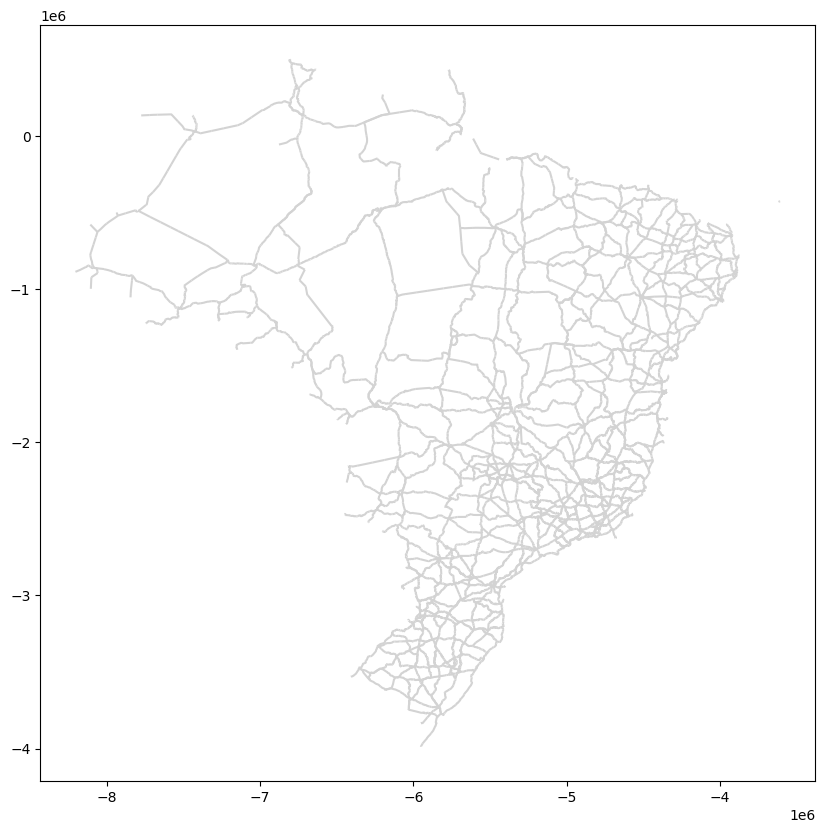

In [22]:
rodovias_all = gpd.read_file("/content/georoads.json")
# rodovias = rodovias.to_crs(epsg=4674)
rodovias_all = rodovias_all.to_crs(epsg=3857)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
rodovias_all.plot(ax=ax, color='lightgray')
# gdf_acidentes_x.plot(ax=ax, color='red', markersize=5)
plt.show()


In [ ]:
gdf_acidentes_x.geometry.x

In [ ]:
# import plotly.graph_objects as go
# gdf_acidentes_x['im_exists'] = 10
# fig = go.Figure(go.Densitymapbox(lat=gdf_acidentes_x.geometry.y, lon=gdf_acidentes_x.geometry.x, z=gdf_acidentes_x['im_exists'],
#                                  radius=5))
# fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=-51.9653, mapbox_center_lat=-29.4685)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_layout(mapbox_zoom=12)
# fig.show()


# # -29.4685, Longitude: -51.9653

In [29]:
gdf_acidentes.columns

Index(['data', 'horario', 'n_da_ocorrencia', 'tipo_de_ocorrencia', 'km',
       'trecho', 'sentido', 'tipo_de_acidente', 'automovel', 'bicicleta',
       'caminhao', 'moto', 'onibus', 'outros', 'tracao_animal',
       'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios',
       'ilesos', 'levemente_feridos', 'moderadamente_feridos',
       'gravemente_feridos', 'mortos', 'km_c', 'geometry', 'hover'],
      dtype='object')

In [49]:
gdf_acidentes["hover"] = (
    gdf_acidentes["data"].astype(str) + "<br>" + gdf_acidentes["horario"]
    + "<br>" + "Mortos: " + gdf_acidentes["mortos"].astype(str)
    + "<br>" + "Km: " + gdf_acidentes["km"].astype(str)
    + "<br>" + gdf_acidentes["tipo_de_acidente"]
    + "<br> Veículos: "
    + "<br>  - Automovel: " + gdf_acidentes["automovel"].astype(str)
    + "<br>  - Moto: " + gdf_acidentes["moto"].astype(str)
    + "<br>  - Caminhao: " + gdf_acidentes["caminhao"].astype(str)
    + "<br>  - Onibus: " + gdf_acidentes["onibus"].astype(str)
    + "<br>  - Bicicleta: " + gdf_acidentes["bicicleta"].astype(str)
)

In [50]:
import plotly.graph_objects as go

# Certifique-se de que o GeoDataFrame está em WGS84 (lat/lon)
gdf_acidentes = gdf_acidentes.to_crs("EPSG:4326")

fig = go.Figure(go.Scattermapbox(
    lat=gdf_acidentes.geometry.y,
    lon=gdf_acidentes.geometry.x,
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=12,
        color='red'
    ),
    hovertext=gdf_acidentes['hover'],  # coluna a exibir
    hoverinfo='text'
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": -29.4685, "lon": -51.9653},
    mapbox_zoom=12,
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

fig.show()
